In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [3]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.duplicated().sum()

0

In [9]:
# we will be using z-scores for normalisation as upper bound is known to us 
df.drop(columns= ['Serial No.'], inplace = True)

In [10]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [12]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 4)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
303,323,107,3,3.5,3.5,8.55,1
202,340,120,5,4.5,4.5,9.91,1
349,313,101,3,2.5,3.0,8.04,0
272,294,95,1,1.5,1.5,7.64,0
192,322,114,5,4.5,4.0,8.94,1
...,...,...,...,...,...,...,...
385,335,117,5,5.0,5.0,9.82,1
197,310,106,2,3.5,2.5,8.33,0
439,312,105,2,1.5,3.0,8.46,0
174,321,111,4,4.0,4.0,8.97,1


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_train_scaled

array([[0.66      , 0.53571429, 0.5       , ..., 0.625     , 0.56089744,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.875     , 0.99679487,
        1.        ],
       [0.46      , 0.32142857, 0.5       , ..., 0.5       , 0.3974359 ,
        0.        ],
       ...,
       [0.44      , 0.46428571, 0.25      , ..., 0.5       , 0.53205128,
        0.        ],
       [0.62      , 0.67857143, 0.75      , ..., 0.75      , 0.69551282,
        1.        ],
       [0.4       , 0.5       , 0.75      , ..., 0.375     , 0.5       ,
        0.        ]])

In [20]:
import tensorflow 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [21]:
model = Sequential()
model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(1, activation = 'linear'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss = "mean_squared_error", optimizer = "Adam")

In [28]:
history = model.fit(x_train_scaled, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
10/10 [==============================] - 1s 26ms/step - loss: 0.2108 - val_loss: 0.1935
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1630 - val_loss: 0.1447
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1192 - val_loss: 0.1027
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0843 - val_loss: 0.0679
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0586 - val_loss: 0.0486
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0462 - val_loss: 0.0397
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0412 - val_loss: 0.0363
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0389 - val_loss: 0.0341
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0366 - val_loss: 0.0322
Epoch 10/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0343 - val_loss: 0.0305


In [29]:
y_pred = model.predict(x_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [30]:
from sklearn.metrics import r2_score  
r2_score(y_test, y_pred)

-0.8664005790206397

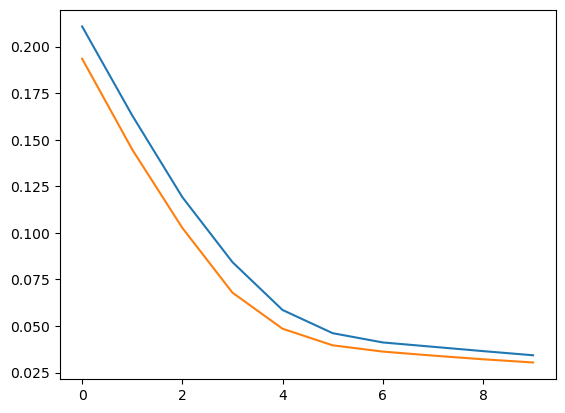

In [31]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])